In [1]:
# Scientific computing imports
import itertools
import numpy
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import seaborn; seaborn.set()

from shipnet_randv1 import MultiPlex,ShipNET

In [2]:
# set directory

import os
import glob

os.chdir("C:\Users\colinsh\Documents\compship\Data")
os.listdir("./")

# Using glob to list the output directory
glob.glob("simpleship_all50/ship-*")[0:5]

['simpleship_all50\\ship-bh1-h3-red2-20150728-0',
 'simpleship_all50\\ship-bh1-h3-red2-20150728-1',
 'simpleship_all50\\ship-bh1-h3-red2-20150728-10',
 'simpleship_all50\\ship-bh1-h3-red2-20150728-100',
 'simpleship_all50\\ship-bh1-h3-red2-20150728-101']

In [3]:
all_data = pd.read_csv(os.path.join("simpleship_all50", "series_all.csv"),index_col=None)
#all_data = pd.read_csv(os.path.join("warship_perm_noexc_fullh_trans", "series_all.csv"),index_col=None)
#type_data = pd.read_csv(os.path.join("simple_perm_noexc", "series_type.csv"),index_col=None)

In [4]:
#all_data=all_data.drop(all_data.columns[[0]],axis=1)
print all_data

      num_bh  height_dc  redundancy  permeability  interactions_total  \
0          1          3           2             0        1.298074e+33   
1          1          3           2             0        2.596148e+33   
2          1          3           2             0        2.596148e+33   
3          1          3           2             0        6.490371e+32   
4          1          3           2             0        1.298074e+33   
5          1          3           2             0        8.112964e+31   
6          1          3           2             0        1.622593e+32   
7          1          3           2             0        2.596148e+33   
8          1          3           2             0        1.298074e+33   
9          1          3           2             0        2.596148e+33   
10         1          3           2             0        1.298074e+33   
11         1          3           2             0        8.112964e+31   
12         1          3           2             0  

In [12]:
ship=ShipNET([8,3,6])
for x in range(2):
    for z in range (4,6):
        for y in range(3):
            ship.remove_ship_node((x,y,z))
for x in range(6,8):
    for z in range (4,6):
        for y in range(3):
            ship.remove_ship_node((x,y,z))
ship.remove_ship_node((0,0,0))
ship.remove_ship_node((0,1,0))
ship.remove_ship_node((0,2,0))

In [10]:
print all_data #[['num_bh','height_dc']]

      num_bh  height_dc  redundancy  permeability  interactions_total  \
0          1          3           2             0        1.298074e+33   
1          1          3           2             0        2.596148e+33   
2          1          3           2             0        2.596148e+33   
3          1          3           2             0        6.490371e+32   
4          1          3           2             0        1.298074e+33   
5          1          3           2             0        8.112964e+31   
6          1          3           2             0        1.622593e+32   
7          1          3           2             0        2.596148e+33   
8          1          3           2             0        1.298074e+33   
9          1          3           2             0        2.596148e+33   
10         1          3           2             0        1.298074e+33   
11         1          3           2             0        8.112964e+31   
12         1          3           2             0  

In [13]:
nodes=[]
for n in ship.ship.nodes():
    nodes.append(str(n))

edges=[]
for e in ship.ship.edges():
    edges.append(str(e))

In [39]:
node_max=all_data[nodes].max()
ratio_total=all_data.apply(lambda row: row[nodes].max()/row['interactions_total'],axis=1)   
ratio_nodes=all_data.apply(lambda row: row[nodes].max()/row['node_total'],axis=1)   
ratio_edges=all_data.apply(lambda row: row[edges].max()/row['edge_total'],axis=1)   
print ratio_total
print ratio_nodes
print ratio_edges

0     0.997457
1     0.985146
2     0.996612
3     0.964347
4     0.986467
5     0.964946
6     0.998089
7     0.950233
8     0.995149
9     0.991058
10    0.997297
11    0.993512
12    0.957365
13    0.995666
14    0.994937
...
315    0.933487
316    0.936315
317    0.937855
318    0.961482
319    0.924023
320    0.987856
321    0.868096
322    0.995081
323    0.988430
324    0.986739
325    0.980344
326    0.987627
327    0.777161
328    0.931038
329    0.958813
Length: 330, dtype: float64
0     0.997506
1     0.985460
2     0.996713
3     0.964954
4     0.986769
5     0.965516
6     0.998139
7     0.950912
8     0.995250
9     0.991224
10    0.997365
11    0.993682
12    0.957695
13    0.995730
14    0.995080
...
315    0.933690
316    0.936496
317    0.938019
318    0.961652
319    0.924350
320    0.987954
321    0.868473
322    0.995204
323    0.988515
324    0.986886
325    0.980468
326    0.987720
327    0.777614
328    0.931290
329    0.958985
Length: 330, dtype: float64
0     

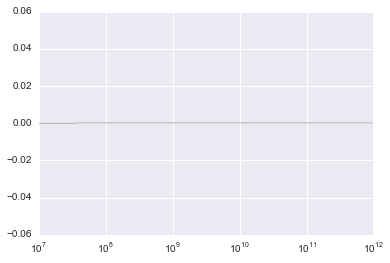

In [14]:
%matplotlib inline

slct_data=[]
for h in range(3,4):
    for r in range(0,11):
        red=r/10.0
        #print h,red
        slct_data.append(list(all_data.loc[(all_data["height_dc"] == h) & (all_data["permeability"]==red),
                                     "interactions_total"]))
slct_data=list(itertools.chain(*slct_data))
#print slct_data
f = plt.figure()
plt.hist(slct_data, bins=numpy.logspace(7.0, 12.0, 10))
plt.gca().set_xscale("log")
#_ = plt.hist(slct_data,bins=numpy.logspace(0, 12,12),color="red",alpha=0.25) #,bins=numpy.logspace(0, 12)

In [6]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
all_data['int_log']=all_data.apply(lambda row: numpy.log10(row['interactions_total']),axis=1)

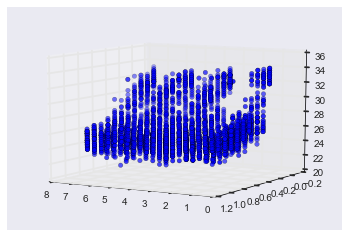

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(list(all_data['num_bh']),
               list(all_data['permeability']),
               list(all_data['int_log']))
#ax.set_zscale('log')
#ax.set_zlim(10**20,10**12)
ax.view_init(elev=10.,azim=120)
#for ii in xrange(0,360,1):
    #ax.view_init(elev=10., azim=ii)
    #fig.savefig("movie{}.png".format(ii))

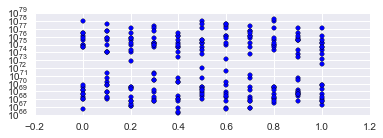

In [147]:
#transitions for fullh_noexc
fig=plt.figure()
ax=fig.add_subplot(2,1,1)
ax.scatter(all_data['permeability'],all_data['interactions_total'])
ax.set_yscale('log')

In [51]:
averages=all_data.groupby(['num_bh','permeability']).mean()
averages

height_dc  redundancy  interactions_total    node_total  \
num_bh permeability                                                            
1      0.0                   3           2        2.026618e+33  2.026618e+33   
       0.1                   3           2        7.595516e+32  7.595516e+32   
       0.2                   3           2        6.412695e+32  6.412695e+32   
       0.3                   3           2        1.850720e+32  1.850720e+32   
       0.4                   3           2        5.870243e+28  5.870243e+28   
       0.5                   3           2        4.137781e+27  4.137781e+27   
       0.6                   3           2        2.596375e+31  2.596375e+31   
       0.7                   3           2        1.928564e+26  1.928564e+26   
       0.8                   3           2        6.570204e+25  6.570204e+25   
       0.9                   3           2        4.068762e+25  4.068762e+25   
       1.0                   3           2        3.147551e+25  3.147551e+25   
2      0.0                   3           2        3.783862e+26  3.783862e+26   
       0.1                   3           2        1.566199e+26  1.566199e+26   
       0.2                   3           2        8.717225e+25  8.717225e+25   
       0.3                   3           2        3.999290e+25  3.999290e+25   
       0.4                   3           2        4.048969e+25  4.048969e+25   
       0.5                   3           2        3.984105e+25  3.984105e+25   
       0.6                   3           2        1.591474e+25  1.591474e+25   
       0.7                   3           2        3.132126e+25  3.132126e+25   
       0.8                   3           2        1.533661e+25  1.533661e+25   
       0.9                   3           2        2.245734e+25  2.245734e+25   
       1.0                   3           2        8.212069e+26  8.212069e+26   
3      0.0                   3           2        4.533633e+32  4.533633e+32   
       0.1                   3           2        2.003404e+32  2.003404e+32   
       0.2                   3           2        1.819831e+32  1.819831e+32   
       0.3                   3           2        2.727649e+31  2.727649e+31   
       0.4                   3           2        1.058851e+32  1.058851e+32   
       0.5                   3           2        2.596606e+31  2.596606e+31   
       0.6                   3           2        1.746800e+26  1.746800e+26   
       0.7                   3           2        5.427289e+25  5.427289e+25   
...                        ...         ...                 ...           ...   
5      0.3                   3           2        3.736659e+31  3.736659e+31   
       0.4                   3           2        1.949620e+31  1.949620e+31   
       0.5                   3           2        2.723149e+28  2.723149e+28   
       0.6                   3           2        1.623790e+30  1.623790e+30   
       0.7                   3           2        5.490488e+25  5.490488e+25   
       0.8                   3           2        6.236799e+25  6.236799e+25   
       0.9                   3           2        2.319008e+25  2.319008e+25   
       1.0                   3           2        6.026840e+25  6.026840e+25   
6      0.0                   3           2        4.826976e+30  4.826976e+30   
       0.1                   3           2        3.525284e+30  3.525284e+30   
       0.2                   3           2        9.352940e+29  9.352940e+29   
       0.3                   3           2        1.626047e+29  1.626047e+29   
       0.4                   3           2        3.778076e+28  3.778076e+28   
       0.5                   3           2        1.709185e+27  1.709185e+27   
       0.6                   3           2        1.500906e+26  1.500906e+26   
       0.7                   3           2        4.525697e+25  4.525697e+25   
       0.8                   3           2        3.670288e+25  3.670288e+25   
       0.9           

In [53]:
#av_sep=averages.unstack(level=1)
av_sep=averages.reset_index()
av_sep

,index,num_bh,permeability,height_dc,redundancy,interactions_total,node_total,edge_total,"(4, 2, 2)","(3, 0, 3)",...,"((0, 1, 3), (1, 1, 3))","((5, 1, 4), (5, 2, 4))","((4, 0, 1), (3, 0, 1))","((5, 2, 4), (4, 2, 4))","((5, 2, 4), (5, 2, 5))","((6, 2, 3), (6, 1, 3))","((6, 2, 1), (6, 1, 1))","((2, 1, 2), (2, 2, 2))","((2, 1, 0), (2, 2, 0))",int_log
0,0,1,0.0,3,2,2.026618e+33,2.026618e+33,3.180514e+22,1.00,1,...,1.688207e+06,1,1.00,1,1,1,1.00,1.00,1.00,32.992888
1,1,1,0.1,3,2,7.595516e+32,7.595516e+32,9.948430e+21,104866.18,1,...,1.596457e+06,1,26256.30,1,1,1,1.02,3.56,8.92,30.079104
2,2,1,0.2,3,2,6.412695e+32,6.412695e+32,9.406412e+21,62946.60,1,...,1.363149e+06,1,22733.70,1,1,1,1.46,3.38,9.52,28.497377
3,3,1,0.3,3,2,1.850720e+32,1.850720e+32,1.984756e+21,83948.92,1,...,1.601700e+06,1,22488.34,1,1,1,1.30,8.26,8.60,27.616633
4,4,1,0.4,3,2,5.870243e+28,5.870243e+28,2.355520e+17,4.02,1,...,1.711800e+06,1,21026.58,1,1,1,1.10,1.62,4.28,26.093520
5,5,1,0.5,3,2,4.137781e+27,4.137781e+27,3.525946e+16,4.00,1,...,1.599078e+06,1,1363.72,1,1,1,1.12,2.22,6.58,25.894970
6,6,1,0.6,3,2,2.596375e+31,2.596375e+31,1.889070e+20,6.54,1,...,1.567621e+06,1,4.06,1,1,1,1.00,2.56,5.14,26.069246
7,7,1,0.7,3,2,1.928564e+26,1.928564e+26,1.723846e+15,1.40,1,...,1.803551e+06,1,1.16,1,1,1,1.04,1.38,1.60,25.461232
8,8,1,0.8,3,2,6.570204e+25,6.570204e+25,1.084686e+14,1.32,1,...,1.724908e+06,1,1.18,1,1,1,1.06,1.24,1.98,25.070420
9,9,1,0.9,3,2,4.068762e+25,4.068762e+25,1.259743e+13,1.10,1,...,2.603090e+06,1,1.10,1,1,1,1.02,1.06,1.14,24.907550


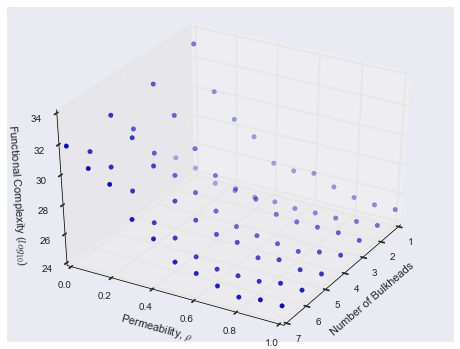

In [81]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(av_sep['num_bh'],
               av_sep['permeability'],
               av_sep['int_log'])
ax.set_xlim(1,7)
ax.set_ylim(0.0,1.0)
ax.set_xlabel('Number of Bulkheads')
ax.set_ylabel(r'Permeability, $\rho$')
ax.set_zlabel('Functional Complexity ($log_{10}$)')
ax.view_init(elev=35.,azim=30)
fig.savefig('Functional Complexity.png',transparent=True)

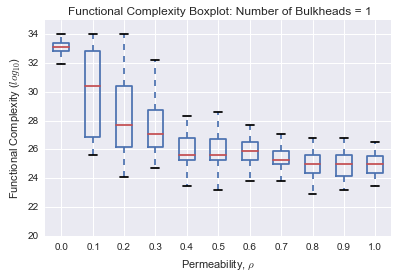

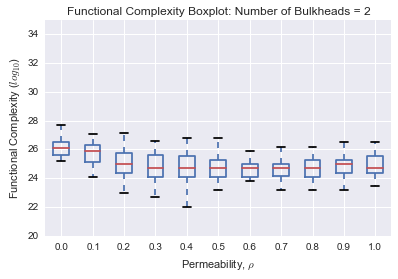

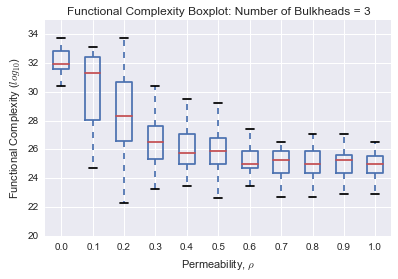

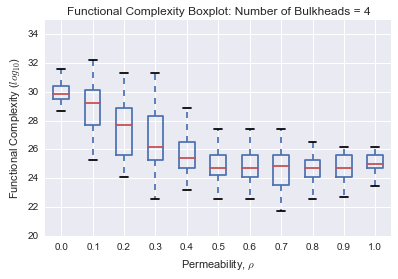

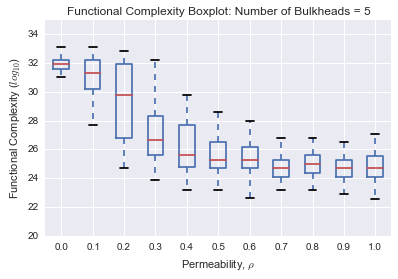

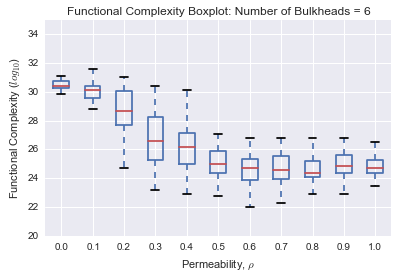

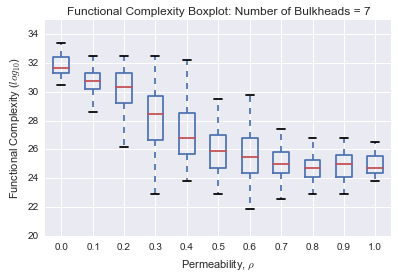

In [123]:
bh=7
for bh in xrange(1,8):
    axes=all_data.loc[all_data['num_bh']==bh].boxplot(column='int_log',by='permeability')

    fig_title='Functional Complexity Boxplot: Number of Bulkheads = {}'.format(bh)
    fig=axes.get_figure()
    fig.suptitle('')
    plt.xlabel(r'Permeability, $\rho$')
    plt.ylabel('Functional Complexity ($log_{10}$)')
    plt.ylim(20,35)
    plt.title(fig_title)
    save_title='boxplot_bh{}'.format(bh)
    plt.savefig(save_title,transparency=True)




In [152]:
node_10=all_data.apply(lambda row: numpy.log10(row[nodes]),axis=1)
node_10['num_bh']=all_data['num_bh']
node_10['perm']=all_data['permeability'].astype(float)

node_ave=node_10.groupby(['num_bh','perm']).mean()
node_ave=node_ave.reset_index()
node_ave

,num_bh,perm,"(4, 2, 2)","(3, 0, 3)","(7, 1, 3)","(2, 2, 4)","(7, 2, 3)","(6, 0, 0)","(5, 2, 1)","(7, 1, 1)",...,"(2, 1, 2)","(5, 2, 5)","(4, 2, 4)","(1, 1, 1)","(2, 2, 2)","(2, 1, 0)","(1, 1, 3)","(2, 2, 0)","(4, 2, 0)","(3, 0, 1)"
0,1,0.0,0.000000,0,1.167996,0,0,0.000000,0.000000,5.71957,...,15.346509,0,0,7.140431,0.000000,11.017698,7.826780,0.000000,0.000000,0.000000
1,1,0.1,0.463586,0,1.083708,0,0,0.030103,0.078268,5.71957,...,15.214056,0,0,7.664224,0.282968,11.818438,7.640141,0.276948,0.397360,0.445524
2,1,0.2,0.475627,0,1.180038,0,0,0.030103,0.355215,5.71957,...,15.220077,0,0,7.585956,0.295009,12.577033,7.507688,0.535833,0.957275,0.776657
3,1,0.3,0.602060,0,1.107790,0,0,0.054185,0.421442,5.71957,...,15.659580,0,0,7.820759,0.403380,12.685404,7.399317,0.475627,0.668287,0.535833
4,1,0.4,0.132453,0,1.155955,0,0,0.054185,0.325112,5.71957,...,16.207455,0,0,8.338531,0.114391,13.088784,7.465544,0.409401,0.583998,0.415421
5,1,0.5,0.168577,0,1.149935,0,0,0.024082,0.264906,5.71957,...,16.370011,0,0,8.428840,0.150515,13.329608,7.585956,0.481648,0.740534,0.451545
6,1,0.6,0.120412,0,1.149935,0,0,0.030103,0.114391,5.71957,...,15.996734,0,0,8.627520,0.114391,13.823297,7.585956,0.252865,0.337154,0.228783
7,1,0.7,0.054185,0,1.071667,0,0,0.012041,0.066227,5.71957,...,16.845639,0,0,8.850282,0.054185,13.985854,7.477585,0.132453,0.228783,0.066227
8,1,0.8,0.066227,0,1.077687,0,0,0.006021,0.048165,5.71957,...,16.923906,0,0,8.784055,0.066227,14.172492,7.640141,0.174597,0.204700,0.048165
9,1,0.9,0.030103,0,1.137893,0,0,0.000000,0.024082,5.71957,...,17.044318,0,0,8.976714,0.018062,14.341069,7.573915,0.036124,0.048165,0.030103


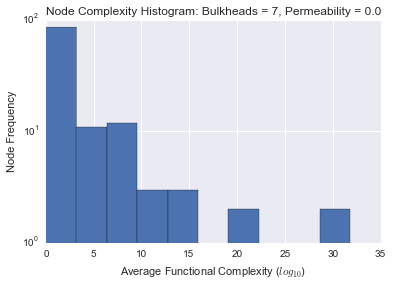

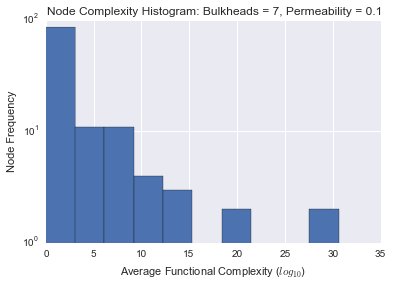

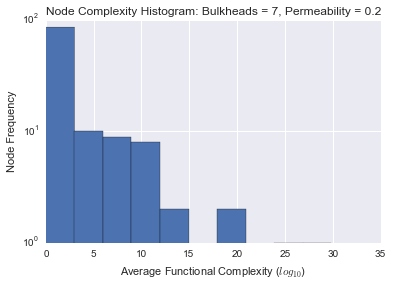

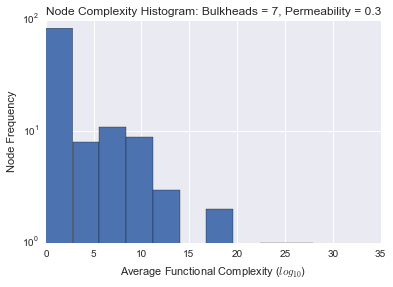

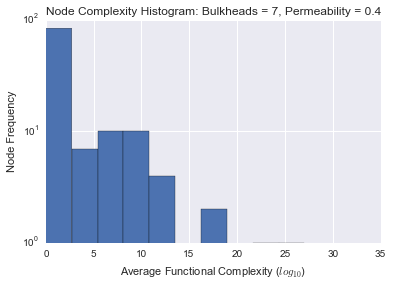

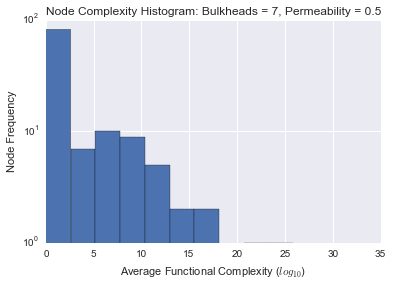

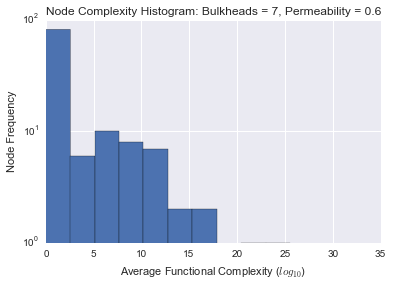

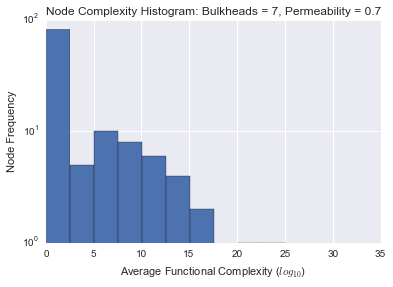

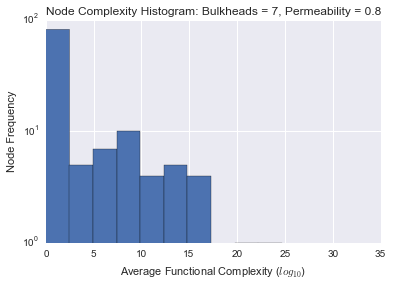

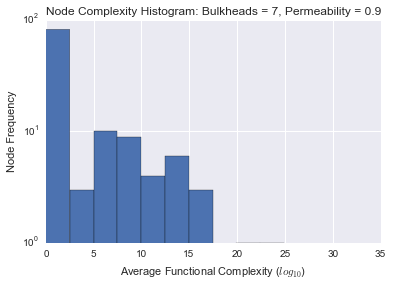

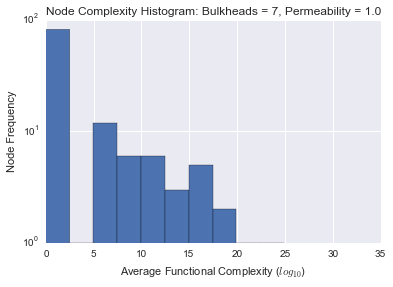

In [173]:
bh=7
p=.1

for n in xrange(0,11):
    p=n/10.0
    axes=node_ave.loc[(node_ave['num_bh']==bh) & (node_ave['perm']==p)].transpose().hist()
    fig.suptitle('')
    fig_title='Node Complexity Histogram: Bulkheads = {}, Permeability = {}'.format(bh,p)
    plt.xlabel('Average Functional Complexity ($log_{10}$)')
    plt.ylabel('Node Frequency')
    plt.xlim(0,35)
    plt.gca().set_yscale('log')
    plt.title(fig_title)
    save_title='n_hist_bh{}_p{}.png'.format(bh,n)
    plt.savefig(save_title,transparency=True)


In [169]:
edge_10=all_data.apply(lambda row: numpy.log10(row[edges]),axis=1)
edge_10['num_bh']=all_data['num_bh']
edge_10['perm']=all_data['permeability'].astype(float)

edge_ave=edge_10.groupby(['num_bh','perm']).mean()
edge_ave=edge_ave.reset_index()
edge_ave

,num_bh,perm,"((4, 2, 2), (4, 1, 2))","((4, 2, 2), (4, 2, 3))","((4, 2, 2), (3, 2, 2))","((4, 2, 2), (5, 2, 2))","((4, 2, 2), (4, 2, 1))","((3, 0, 3), (3, 0, 2))","((3, 0, 3), (4, 0, 3))","((3, 0, 3), (2, 0, 3))",...,"((0, 1, 1), (1, 1, 1))","((0, 1, 3), (1, 1, 3))","((5, 1, 4), (5, 2, 4))","((4, 0, 1), (3, 0, 1))","((5, 2, 4), (4, 2, 4))","((5, 2, 4), (5, 2, 5))","((6, 2, 3), (6, 1, 3))","((6, 2, 1), (6, 1, 1))","((2, 1, 2), (2, 2, 2))","((2, 1, 0), (2, 2, 0))"
0,1,0.0,0.000000,0,0.000000,0.000000,0.000000,0,0,0,...,3.889308,6.044682,0,0.000000,0,0,0,0.000000,0.000000,0.000000
1,1,0.1,0.144494,0,0.463586,0.144494,0.174597,0,0,0,...,4.425141,6.026621,0,0.295009,0,0,0,0.006021,0.132453,0.192659
2,1,0.2,0.144494,0,0.445524,0.180618,0.180618,0,0,0,...,4.569635,5.966415,0,0.439504,0,0,0,0.102350,0.216742,0.331133
3,1,0.3,0.186639,0,0.559916,0.252865,0.204700,0,0,0,...,4.744233,5.870085,0,0.421442,0,0,0,0.072247,0.276948,0.349195
4,1,0.4,0.078268,0,0.096330,0.030103,0.060206,0,0,0,...,4.991077,6.008559,0,0.325112,0,0,0,0.024082,0.090309,0.240824
5,1,0.5,0.072247,0,0.162556,0.090309,0.012041,0,0,0,...,4.973016,6.050703,0,0.349195,0,0,0,0.030103,0.132453,0.288989
6,1,0.6,0.036124,0,0.114391,0.078268,0.012041,0,0,0,...,5.189757,6.044682,0,0.132453,0,0,0,0.000000,0.096330,0.162556
7,1,0.7,0.024082,0,0.054185,0.030103,0.000000,0,0,0,...,5.249963,6.080806,0,0.042144,0,0,0,0.012041,0.048165,0.078268
8,1,0.8,0.018062,0,0.066227,0.042144,0.006021,0,0,0,...,5.207819,6.008559,0,0.048165,0,0,0,0.018062,0.060206,0.114391
9,1,0.9,0.006021,0,0.030103,0.024082,0.000000,0,0,0,...,5.280066,6.074785,0,0.030103,0,0,0,0.006021,0.018062,0.018062


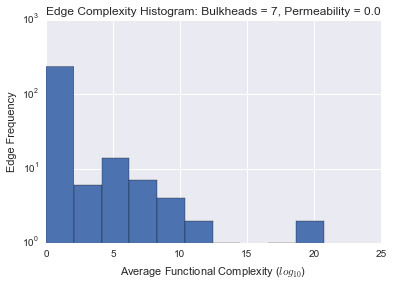

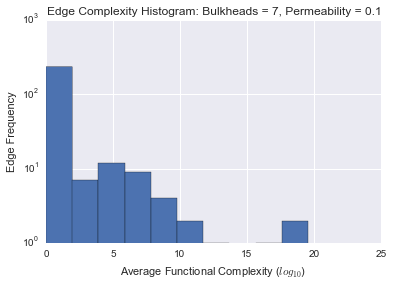

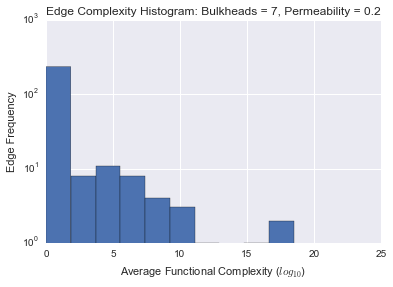

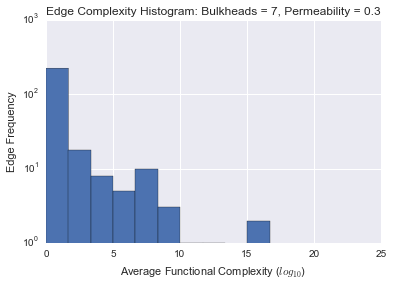

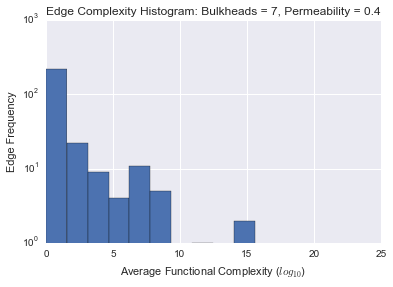

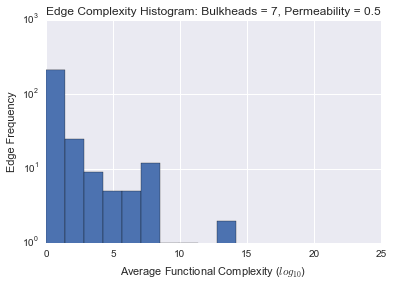

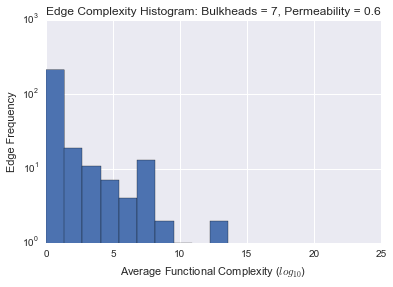

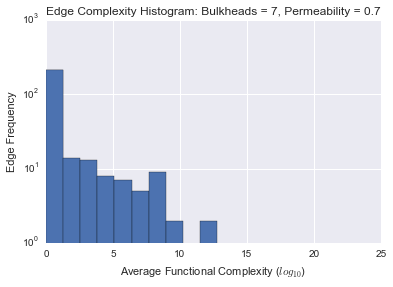

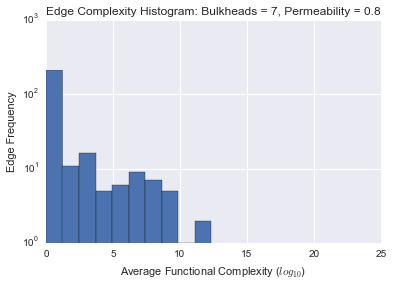

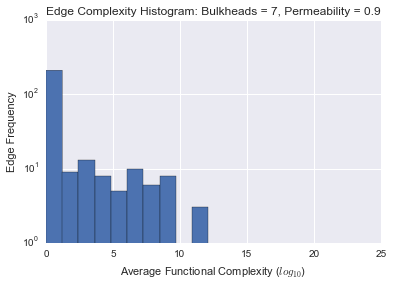

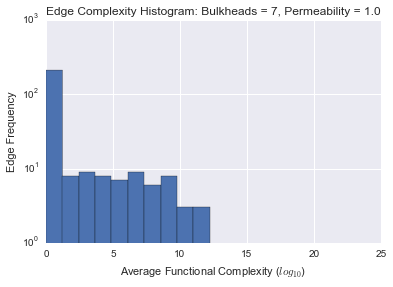

In [175]:
bh=7


for n in xrange(0,11):
    p=n/10.0
    axes=edge_ave.loc[(edge_ave['num_bh']==bh) & (edge_ave['perm']==p)].transpose().hist()
    fig.suptitle('')
    fig_title='Edge Complexity Histogram: Bulkheads = {}, Permeability = {}'.format(bh,p)
    plt.xlabel('Average Functional Complexity ($log_{10}$)')
    plt.ylabel('Edge Frequency')
    plt.xlim(0,25)
    plt.gca().set_yscale('log')
    plt.title(fig_title)
    save_title='e_hist_bh{}_p{}.png'.format(bh,n)
    plt.savefig(save_title,transparency=True)